In [1]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np
from time import time
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# WINDOW_SIZE = 257, CODEBOOK_SIZE = 10000

enable_norm = True

X_train = np.loadtxt("./feature_train.csv", delimiter = ",").reshape(-1,384)
y_train = np.loadtxt("./label_train.csv", delimiter = ",")
X_test = np.loadtxt("./feature_test.csv", delimiter=",").reshape(-1,384)
y_test = np.loadtxt("./label_test.csv", delimiter=",")


In [2]:
if enable_norm:
    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)

    model_normalizer_horizontal = MinMaxScaler()
    model_normalizer_horizontal.fit(X_train)
    X_train = model_normalizer_horizontal.transform(X_train)

    model_normalizer_horizontal = MinMaxScaler()
    model_normalizer_horizontal.fit(X_test)
    X_test = model_normalizer_horizontal.transform(X_test)

    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)

    model_normalizer_vertical = MinMaxScaler()
    model_normalizer_vertical.fit(X_train)

    X_train = model_normalizer_vertical.transform(X_train)
    X_test = model_normalizer_vertical.transform(X_test)

In [3]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Using TensorFlow backend.


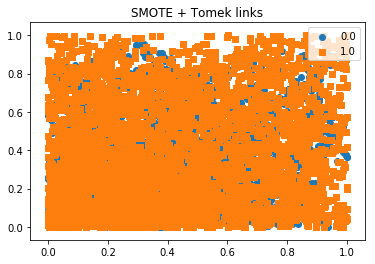

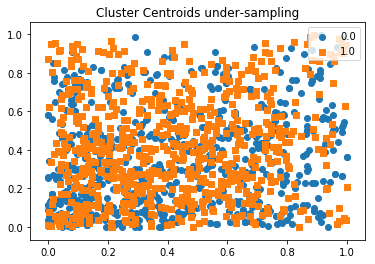

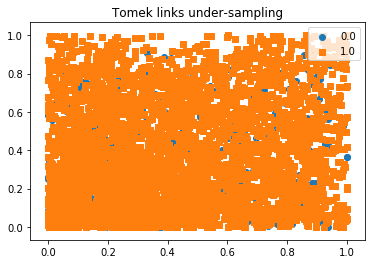

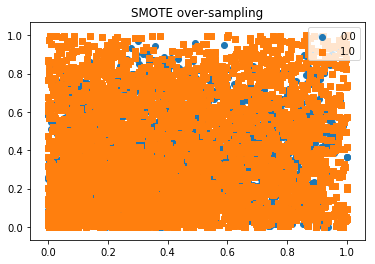

In [4]:
import imblearn

from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')


from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy='auto')
X_cc, y_cc = cc.fit_sample(X_train, y_train)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_sample(X_train, y_train)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [5]:
X_train, y_train = X_smt, y_smt
X_test, y_test = smt.fit_sample(X_test, y_test)

In [6]:
label_names = ['Buggy', 'Correct']

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

-> Processing 10-Fold Cross Validation and Grid Search



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.4min finished


-> Done! Show Grid scores

{'mean_fit_time': array([51.41645679, 27.19706872, 26.49514575]), 'std_fit_time': array([1.46361837, 0.83976383, 0.93546285]), 'mean_score_time': array([2.28672326, 1.64021578, 1.80200567]), 'std_score_time': array([0.18487429, 0.35213262, 0.24806753]), 'param_C': masked_array(data=[1, 1, 1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'poly', 'rbf'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'poly'}, {'C': 1, 'kernel': 'rbf'}], 'split0_test_score': array([0.74551971, 0.92353644, 0.89725209]), 'split1_test_score': array([0.74193548, 0.9390681 , 0.91158901]), 'split2_test_score': array([0.79689367, 0.94384707, 0.94265233]), 'split3_test_score': array([0.76583035, 0.92712067, 0.94145759]), 'split4_test_score': array([0.77870813, 0.93660287, 0.94497608]), 'split5_t

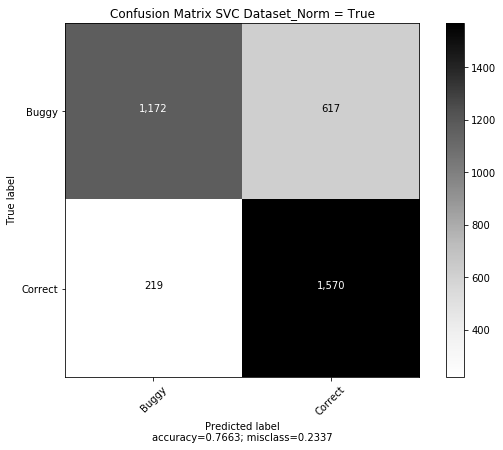

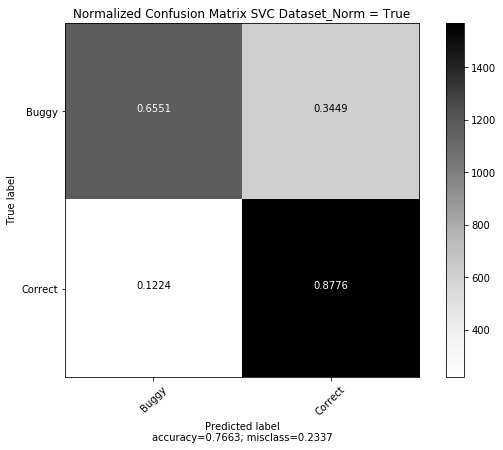




              precision    recall  f1-score   support

         0.0       0.84      0.66      0.74      1789
         1.0       0.72      0.88      0.79      1789

    accuracy                           0.77      3578
   macro avg       0.78      0.77      0.76      3578
weighted avg       0.78      0.77      0.76      3578


Accuracy 0.7663499161542762
Training time : 162.43

Test time : 4.486




In [10]:
# SVM
param_grid_ = {'C': [1], "kernel":["linear","poly", "rbf"]}
print('-> Processing 10-Fold Cross Validation and Grid Search\n')

bow_search = GridSearchCV(SVC(), cv=10, param_grid=param_grid_, scoring='f1_micro', n_jobs=-1, verbose=-1)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
cmat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = cmat, 
                      normalize    = False,
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
plot_confusion_matrix(cm           = cmat, 
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Normalized Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

-> Processing 10-Fold Cross Validation and Grid Search



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.6min finished


-> Done! Show Grid scores

{'mean_fit_time': array([153.97189755,  21.35304701,  17.47523596]), 'std_fit_time': array([21.79676518,  2.04387735,  1.63558412]), 'mean_score_time': array([2.25181031, 1.23984449, 1.37063439]), 'std_score_time': array([0.5976012 , 0.13585907, 0.19415919]), 'param_C': masked_array(data=[10, 10, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'poly', 'rbf'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'poly'}, {'C': 10, 'kernel': 'rbf'}], 'split0_test_score': array([0.74313023, 0.88410992, 0.93548387]), 'split1_test_score': array([0.74193548, 0.91517324, 0.9557945 ]), 'split2_test_score': array([0.79450418, 0.93428913, 0.96296296]), 'split3_test_score': array([0.76941458, 0.9223417 , 0.95221027]), 'split4_test_score': array([0.77990431, 0.92703349, 0.9569378 ]

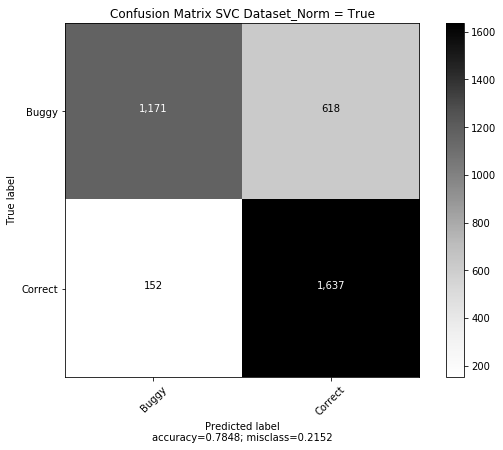

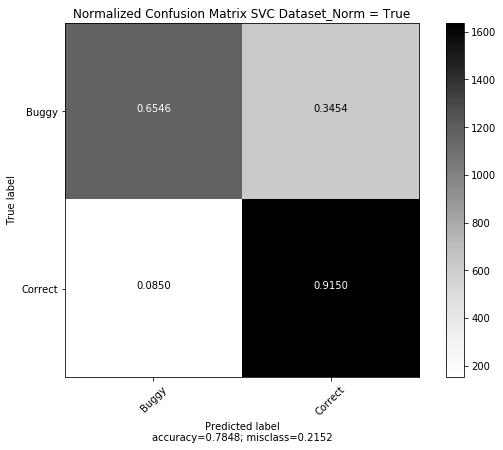




              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75      1789
         1.0       0.73      0.92      0.81      1789

    accuracy                           0.78      3578
   macro avg       0.81      0.78      0.78      3578
weighted avg       0.81      0.78      0.78      3578


Accuracy 0.7847959754052544
Training time : 289.748

Test time : 5.914




In [7]:
# SVM
param_grid_ = {'C': [10], "kernel":["linear","poly", "rbf"]}
print('-> Processing 10-Fold Cross Validation and Grid Search\n')

bow_search = GridSearchCV(SVC(), cv=10, param_grid=param_grid_, scoring='f1_micro', n_jobs=-1, verbose=-1)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
cmat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = cmat, 
                      normalize    = False,
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
plot_confusion_matrix(cm           = cmat, 
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Normalized Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

-> Processing 10-Fold Cross Validation and Grid Search



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 26.3min finished


-> Done! Show Grid scores

{'mean_fit_time': array([989.68443143,  12.56017847,  10.4528127 ]), 'std_fit_time': array([241.06250898,   1.23799949,   1.10467967]), 'mean_score_time': array([1.56316066, 0.78748653, 1.0006604 ]), 'std_score_time': array([0.12963243, 0.05617746, 0.10848976]), 'param_C': masked_array(data=[100, 100, 100],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'poly', 'rbf'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 100, 'kernel': 'linear'}, {'C': 100, 'kernel': 'poly'}, {'C': 100, 'kernel': 'rbf'}], 'split0_test_score': array([0.74193548, 0.81481481, 0.87694146]), 'split1_test_score': array([0.73835125, 0.87574671, 0.92592593]), 'split2_test_score': array([0.7921147 , 0.92951016, 0.96296296]), 'split3_test_score': array([0.77419355, 0.90800478, 0.94982079]), 'split4_test_score': array([0.77511962, 0.92105263, 0.

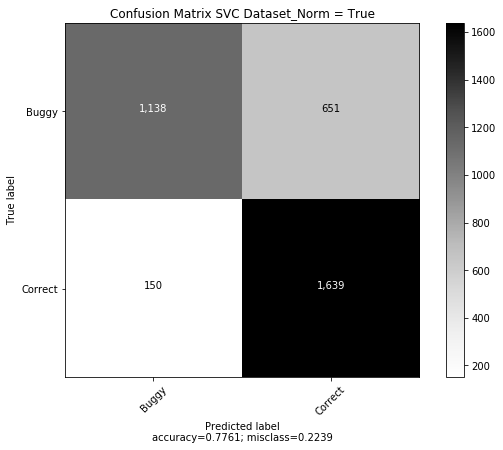

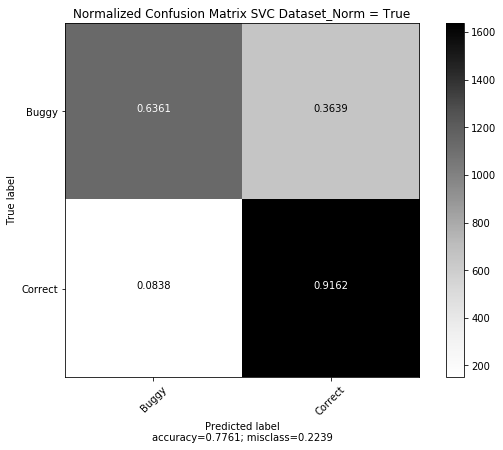




              precision    recall  f1-score   support

         0.0       0.88      0.64      0.74      1789
         1.0       0.72      0.92      0.80      1789

    accuracy                           0.78      3578
   macro avg       0.80      0.78      0.77      3578
weighted avg       0.80      0.78      0.77      3578


Accuracy 0.7761319172722191
Training time : 1592.845

Test time : 4.061




In [8]:
# SVM
param_grid_ = {'C': [100], "kernel":["linear","poly", "rbf"]}
print('-> Processing 10-Fold Cross Validation and Grid Search\n')

bow_search = GridSearchCV(SVC(), cv=10, param_grid=param_grid_, scoring='f1_micro', n_jobs=-1, verbose=-1)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
cmat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = cmat, 
                      normalize    = False,
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
plot_confusion_matrix(cm           = cmat, 
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Normalized Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

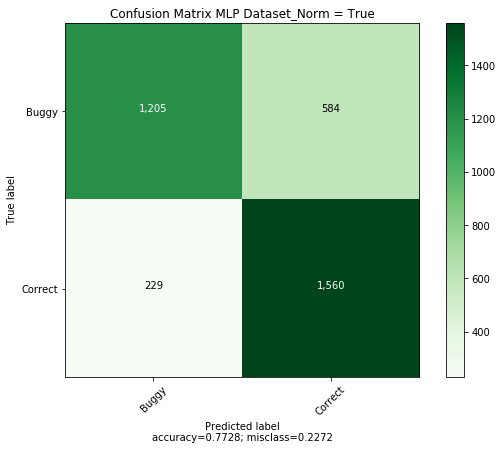

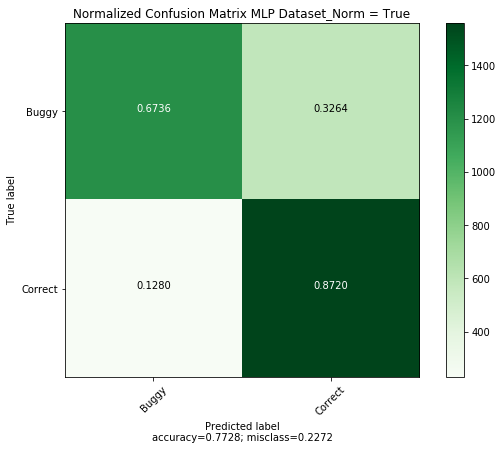

              precision    recall  f1-score   support

         0.0       0.84      0.67      0.75      1789
         1.0       0.73      0.87      0.79      1789

    accuracy                           0.77      3578
   macro avg       0.78      0.77      0.77      3578
weighted avg       0.78      0.77      0.77      3578

Accuracy 0.7727780883174958


In [9]:
# MLPClassifier
clf = MLPClassifier(activation='tanh', alpha=0.03, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(384, 256, 128, 64, 32, 16, 8, 4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=48, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

cmat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = cmat, 
                      normalize    = False,
                      target_names = label_names,
                      cmap = plt.get_cmap('Greens'),
                      title        = "Confusion Matrix MLP Dataset_Norm = %s" % str(enable_norm))
plot_confusion_matrix(cm           = cmat, 
                      target_names = label_names,
                      cmap = plt.get_cmap('Greens'),
                      title        = "Normalized Confusion Matrix MLP Dataset_Norm = %s" % str(enable_norm))
print(classification_report(y_true, y_pred))
print('Accuracy', metrics.accuracy_score(y_pred,y_test))